## Prelimary Data Analysis

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
%matplotlib inline

In [5]:
## load the data
chi_df = pd.read_csv("../data/bikeshare/chicago.csv")
#chi_df.head()
ny_df = pd.read_csv("../data/bikeshare/ny.csv")

dc_df = pd.read_csv("../data/bikeshare/dc.csv")
#dc_df.head()
#ny_df.head()

### 1.1 Demographic Information 
### - Gender

Text(0, 0.5, 'counts')

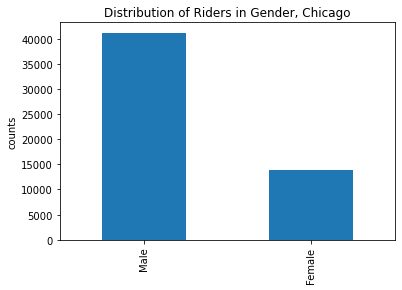

In [17]:
###  Plot the distribution of male to female riders for chicago.csv.
chi_df['gender'].value_counts().plot(kind = "bar")
plt.title("Distribution of Riders in Gender, Chicago")
plt.ylabel("counts")

Text(0, 0.5, 'counts')

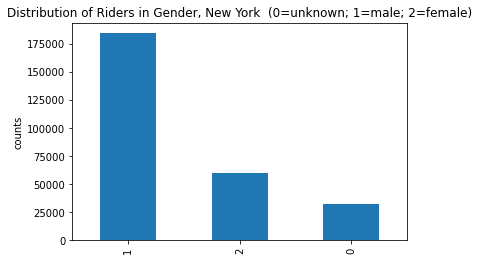

In [22]:
###  Plot the distribution of male to female riders for chicago.csv.
ny_df['gender'].value_counts().plot(kind = "bar")
plt.title("Distribution of Riders in Gender, New York  (0=unknown; 1=male; 2=female)")
plt.ylabel("counts")

### - Birth Years

Text(0, 0.5, 'counts')

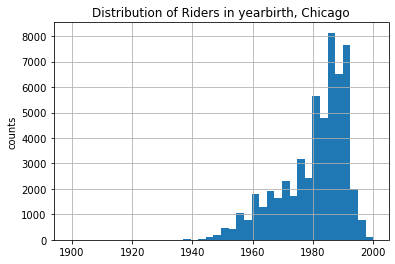

In [23]:
### Plot the distribution of the birth years of bike renters in Chicago and NY
chi_df['birthyear'].hist(bins = 40)
plt.title("Distribution of Riders in yearbirth, Chicago")
plt.ylabel("counts")

Text(0, 0.5, 'counts')

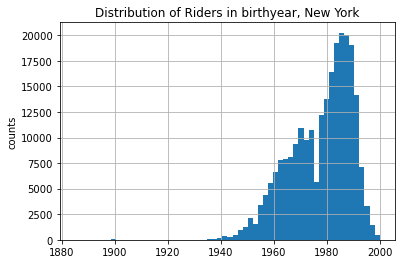

In [24]:
ny_df['birth year'].dropna().hist(bins = 60)
plt.title("Distribution of Riders in birthyear, New York")
plt.ylabel("counts")

**Interpretation:**  It's reasonable to see the largest age groups who use the 
scooters are those born between 1980 and<br /> 1996, as these people are young and almost every
of them use smartphones, and using scooters will be convenient <br /> for them for commuting or
travelling. The user quantities are getting smaller for the people born earlier as <br /> those
people may not be that intereted in the new techs. <br /> <br /> 
There's some data points in New York's data set who was born in around 1900, it's not
reasonable and should be<br />  removed, since it's not very likely for someone who's 120 years
old to ride a scooter.

### 1.2 Rental Times
### - Durations


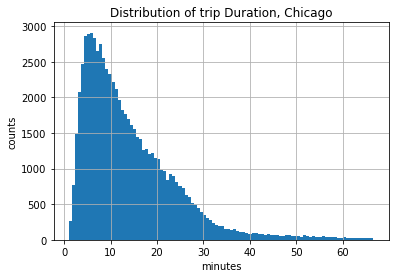

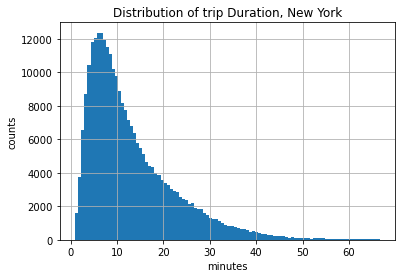

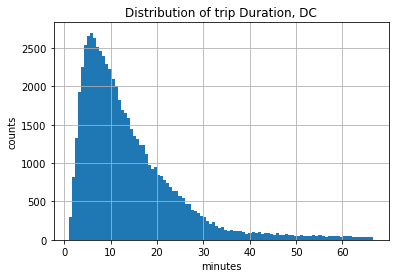

In [31]:
### Are the plots you generated useful? If not, plot them again so that the visualization is more useful.
(chi_df[chi_df['tripduration'] < 4000]['tripduration']/60).hist(bins = 100)
plt.title("Distribution of trip Duration, Chicago")
plt.ylabel("counts")
plt.xlabel("minutes")
plt.show()

(ny_df[ny_df['tripduration'] < 4000]['tripduration']/60).hist(bins = 100)
plt.title("Distribution of trip Duration, New York")
plt.ylabel("counts")
plt.xlabel("minutes")
plt.show()

(dc_df[dc_df['Duration (ms)'] < 4000*1000]['Duration (ms)']/60000).hist(bins = 100)
plt.title("Distribution of trip Duration, DC")
plt.ylabel("counts")
plt.xlabel("minutes")
plt.show()

**Interpretation:**  Intervals of Extreme Values were removed. I restricted the range of observation to Rental Times ≤ 70 minutes, <br /> 
In the plots, what we are seeing are how the majority of the rides are distributed.



### - Start Time

In [36]:
### Plot the start time of trips split by hour for all three cities.
chi_df['starttime_pd'] = pd.to_datetime(chi_df['starttime'])
chi_df['hour'] = chi_df['starttime_pd'].dt.hour

ny_df['starttime_pd'] = pd.to_datetime(ny_df['starttime'])
ny_df['hour'] = ny_df['starttime_pd'].dt.hour

dc_df['starttime_pd'] = pd.to_datetime(dc_df['Start date'])
dc_df['hour'] = dc_df['starttime_pd'].dt.hour

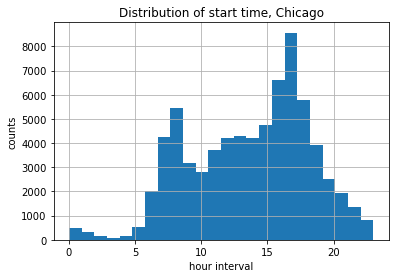

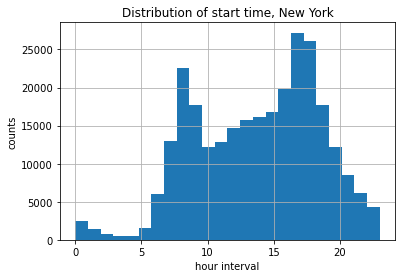

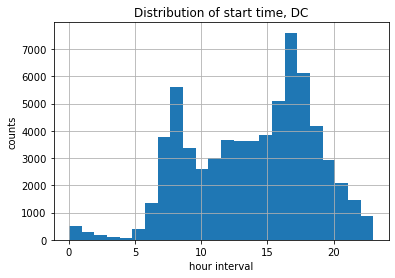

In [37]:
(chi_df['hour']).hist(bins = 24)
#sns.distplot(generated_trip_dur, kde=False, label="Simulated Distribution", norm_hist =True)
plt.title("Distribution of start time, Chicago")
plt.ylabel("counts")
plt.xlabel("hour interval")
plt.show()

(ny_df['hour']).hist(bins = 24)
plt.title("Distribution of start time, New York")
plt.ylabel("counts")
plt.xlabel("hour interval")
plt.show()

(dc_df['hour']).hist(bins = 24)
plt.title("Distribution of start time, DC")
plt.ylabel("counts")
plt.xlabel("hour interval")
plt.show()

**Interpretation**: We see two peaks in the start time distributions at which
around 8:00 and 17:00.  <br /> That's the ususal commuting hours,
and it's reasonable that a lot of people of using the scooters <br />  to commute to work
and home. 

### - Stop Time
Stop Time is investigated similar to Start Time

In [38]:
## Visualize distribution of stop time
chi_df['stoptime_pd'] = pd.to_datetime(chi_df['stoptime'])
chi_df['stop_hour'] = chi_df['stoptime_pd'].dt.hour

ny_df['stoptime_pd'] = pd.to_datetime(ny_df['stoptime'])
ny_df['stophour'] = ny_df['stoptime_pd'].dt.hour

dc_df['stoptime_pd'] = pd.to_datetime(dc_df['End date'])
dc_df['stophour'] = dc_df['stoptime_pd'].dt.hour

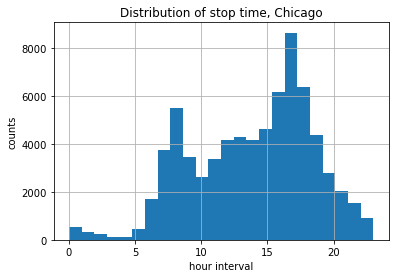

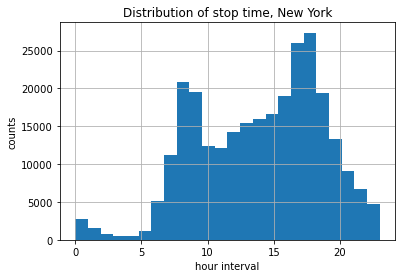

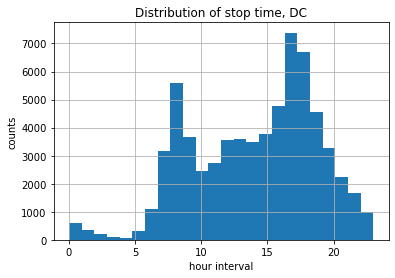

In [43]:
(chi_df['stop_hour']).hist(bins = 24)
plt.title("Distribution of stop time, Chicago")
plt.ylabel("counts")
plt.xlabel("hour interval")
plt.show()

(ny_df['stophour']).hist(bins = 24)
plt.title("Distribution of stop time, New York")
plt.ylabel("counts")
plt.xlabel("hour interval")
plt.show()

(dc_df['stophour']).hist(bins = 24)
plt.title("Distribution of stop time, DC")
plt.ylabel("counts")
plt.xlabel("hour interval")
plt.show()

**Note:** The plotting of stoptime is more of a sanity check, since stoptime = starttime + tripduration. There's perfect correlation <br /> between the three variables: starttime, tripduration and stoptime. When we apply analysis like regression or mix gaussian, <br /> we would not include these three variables at the same time due to
perfect colinearity

## 1.3 User Type

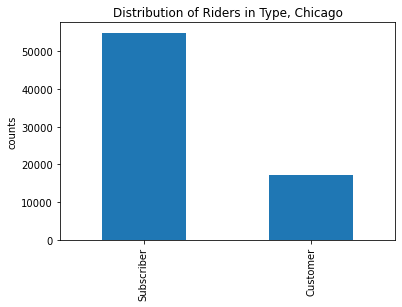

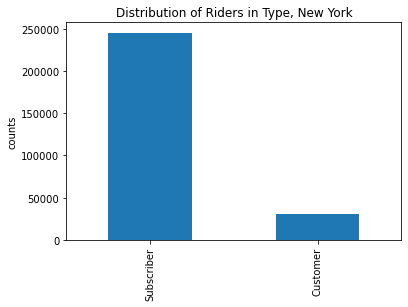

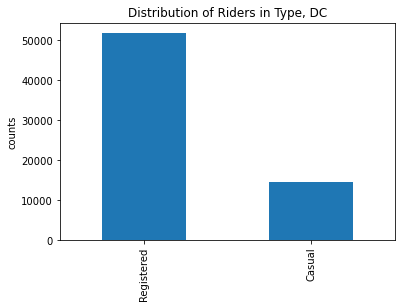

In [55]:
## Visualize distribution of Usertype
chi_df['usertype'].value_counts().plot(kind = "bar")
plt.title("Distribution of Riders in Type, Chicago")
plt.ylabel("counts")
plt.show()

ny_df['usertype'].value_counts().plot(kind = "bar")
plt.title("Distribution of Riders in Type, New York")
plt.ylabel("counts")
plt.show()

dc_df['Member Type'].value_counts().plot(kind = "bar")
plt.title("Distribution of Riders in Type, DC")
plt.ylabel("counts")
plt.show()



**Interpretation:**  More
subscribers/registered riders than casual customers in the three cities.

### 1.4 Start Place Latitiude & Longitude in NY

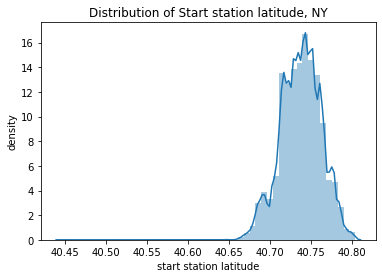

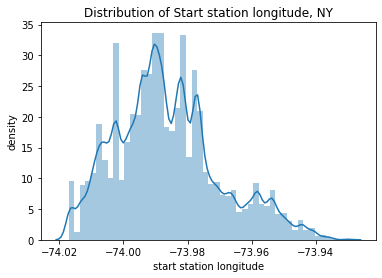

In [58]:
## Visualize distribution NY start latitude
sns.distplot(ny_df["start station latitude"], kde=True)
plt.title("Distribution of Start station latitude, NY")
plt.ylabel("density")
plt.show()

## Visualize distribution NY start longitude
sns.distplot(ny_df["start station longitude"], kde=True)
plt.title("Distribution of Start station longitude, NY")
plt.ylabel("density")
plt.show()

**Interpretation:**  In the distribution
of start place latitude and longitude of New York, we found the latitudes <br />are much more
centered whereas longitudes are more scattered, indicating the scooters are locating<br />
more widespread on longitude.

## Summary and Next Step

*In the part II of Section I, the results from the preliminary analysis will be leveraged to conduct further hypothesis testing: Are there significant difference between subscribers and casual riders on the aspect of rides' stoptime and duration. Namely, a classifier to distinguish subscriber and casual rider if such label is not given in the orginial data. This background and more details will be given in the next part.*
